In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [3]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(150,330)]
i =0
result = np.zeros((2160))

In [4]:
180*12

2160

In [5]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PREC_F.nc')
        PREC_F = data.variables['PREC_F'][0,:,:]
        PREC_F = PREC_F[247:365,700:1300]
        aveplot = PREC_F.mean(axis=0)
        aveplot = aveplot.mean(axis=0)
        result[i] = aveplot
        
        i = i + 1
#********************************************************************

In [6]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history: Sun Mar  8 00:15:29 2020: ncks -v PREC_F -d nlat,0,600 -d nlon,0,3599 B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0329-12.nc B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.0329-12.PREC_F.nc
none
    Conventions: CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-current.htm
    contents: Diagnostic and Prognostic Variables
    source: CCSM POP2, the CCSM Ocean Component
    revision: $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar: All years have exactly  365 days.
    start_time: This dataset was created on 2019-11-10 at 06:48:00.2
    cell_methods: cell_methods = time: mean ==> the variable values are averaged over the time interval between the previous time coordinate and the current one.          cell_methods  absent  ==> the variable values are at the time given by the current time 

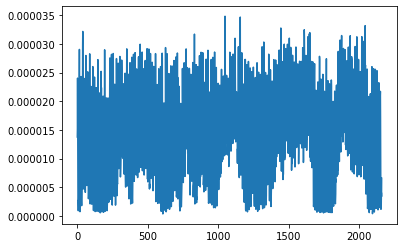

In [5]:
plt.plot(result)

In [6]:
lal2 = np.loadtxt("PREC-new1.out")

In [7]:
lal2.shape

(2040,)

In [9]:
ru = np.hstack((result,lal2))

In [10]:
ww2 = np.convolve(ru, np.ones((60,))/60, mode='valid')
mean = np.mean(ww2)

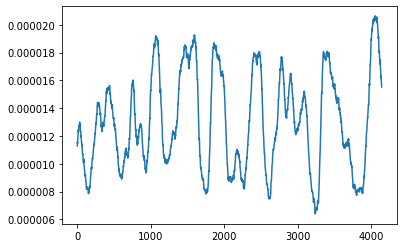

In [11]:
plt.plot(ww2)

In [12]:
d2 = ru.reshape(350,12)

In [13]:
d2mean = np.nanmean(d2,axis=1)

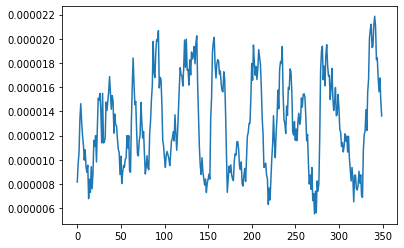

In [14]:
plt.plot(d2mean)

In [15]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

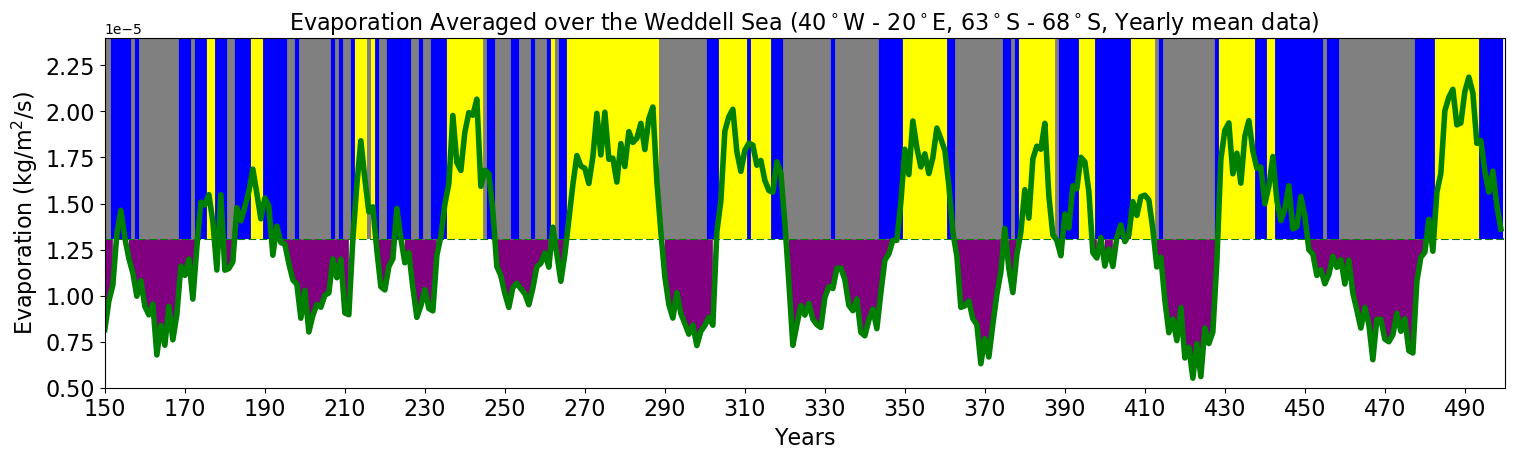

In [22]:
t = np.arange(0,350,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(d2mean,'green',linewidth=4)
ax0.fill_between(t,mean,d2mean,where=d2mean < mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 350, colors = "green",linestyles = "dashed")
plt.vlines(noxx, mean, 0.000024,colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, 0.000024, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, 0.000024, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(0.000005, 0.000024),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))
ax0.set_title('Evaporation Averaged over the Weddell Sea (40$^\circ$W - 20$^\circ$E, 63$^\circ$S - 68$^\circ$S, Yearly mean data)',**my_font)
plt.savefig("prennew.png",bbox_inches='tight',dpi=fig.dpi)

In [32]:
np.savetxt('PE-new1pre.out', d2mean)

In [33]:
eva = np.loadtxt("PE-new1.out")

In [34]:
pe = d2mean + eva

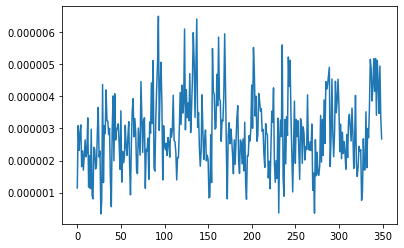

In [35]:
plt.plot(pe)

In [36]:
ww2 = np.convolve(pe, np.ones((5,))/5, mode='valid')
mean = np.nanmean(ww2)

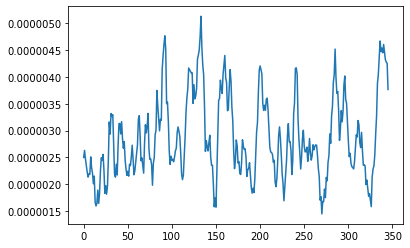

In [37]:
plt.plot(ww2)

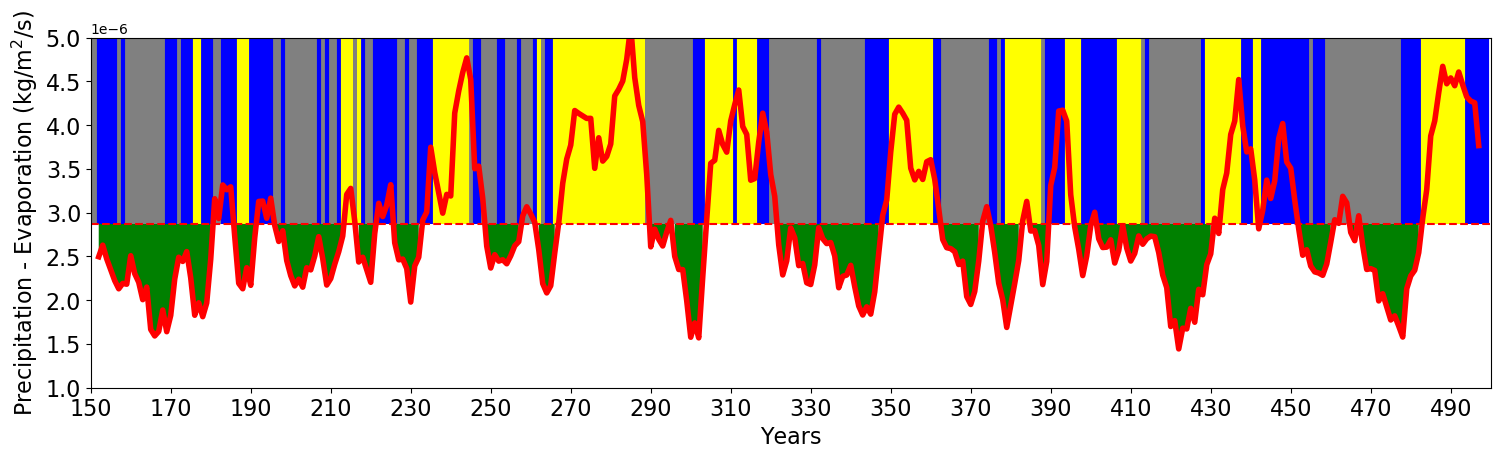

In [38]:
t = np.arange(2,348,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
plt.vlines(noxx, mean, 0.000006,colors = "grey",linewidth=3)
plt.vlines(mrpxx, mean, 0.000006, colors = "blue",linewidth=3)
plt.vlines(wspxx, mean, 0.000006, colors = "yellow",linewidth=3)
ax0.plot(t,ww2,'red',linewidth=4)
ax0.fill_between(t,ww2,mean,where=mean > ww2,facecolor='green', alpha=1)
plt.hlines(mean, 0, 350, colors = "red",linestyles = "dashed")
#plt.vlines(noxx, 0, 0.000005,colors = "grey",linewidth=3)
#plt.vlines(mrpxx, 0, 0.000005, colors = "blue",linewidth=3)
#plt.vlines(wspxx, 0, 0.000005, colors = "yellow",linewidth=3)
#plt.axhspan(std,0.000005,facecolor='yellow', alpha=1)
#plt.axhspan(-std,std,facecolor='lightblue', alpha=1)
#plt.axhspan(-0.000003,-std,facecolor='lightgreen', alpha=1)
#plt.xticks(range(0,3720,240), ['150','170',\
                            #'190','210','230', '250', '270','290','310','330'],**my_font)
plt.xticks(range(0,350,20), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation - Evaporation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
ax0.set(ylim=(0.000001, 0.000005),xlim=(0, 350))
ax = plt.gca()
ax.yaxis.get_major_formatter().set_powerlimits((0,1))

In [39]:
np.savetxt('P-Enewnew.out', ww2)